In [21]:
import pandas as pd
import numpy as np
%matplotlib inline

In [44]:
from os import listdir
from os.path import isfile, isdir, join
from shutil import move

mypath = '../celeba/'
data = pd.DataFrame([f for f in listdir(mypath)])

In [46]:
data.columns = ['path']

In [47]:
data['id'] = data['path'].map(lambda x: x[:6])

In [48]:
data.head()

,path,id
0,069803.png,069803
1,182960.png,182960
2,187891.png,187891
3,142184.png,142184
4,064549.png,064549


In [55]:
txt = pd.read_csv('./identity_CelebA.txt', sep=' ', header=None)

In [56]:
txt.columns = ['path_ori', 'person']
txt['id'] = txt['path_ori'].map(lambda x: x[:6])
txt.head()

,path_ori,person,id
0,000001.jpg,2880,000001
1,000002.jpg,2937,000002
2,000003.jpg,8692,000003
3,000004.jpg,5805,000004
4,000005.jpg,9295,000005


In [57]:
np.unique(txt.person)

array([    1,     2,     3, ..., 10175, 10176, 10177])

In [62]:
paths = txt[['person', 'path_ori']].groupby('person').count().reset_index()

In [65]:
paths.columns = ['person', 'count']

In [66]:
paths.head()

,person,count
0,1,29
1,2,8
2,3,25
3,4,22
4,5,20


In [70]:
df = txt.merge(paths, how='left', on='person')

In [71]:
df = data.merge(df, how='left', on='id')

In [72]:
df.shape

(202281, 5)

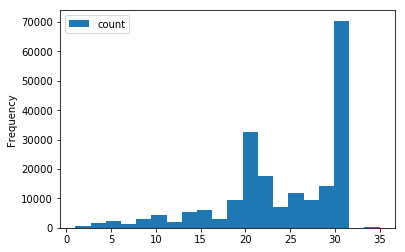

In [73]:
df[['count']].plot.hist(stacked=True, bins=20)

In [74]:
df.head()

,path,id,path_ori,person,count
0,069803.png,069803,069803.jpg,4386,20
1,182960.png,182960,182960.jpg,7325,29
2,187891.png,187891,187891.jpg,6868,9
3,142184.png,142184,142184.jpg,3213,26
4,064549.png,064549,064549.jpg,1904,15


In [37]:
df.shape

(202599, 3)

In [10]:
# Drop person whose pic count is less than 10

In [75]:
train = df[['path', 'count', 'person']]

In [76]:
train.shape

(202281, 3)

In [77]:
train.to_csv('celeba.aligned.train.csv', index=False)

In [79]:
train.head()

,path,count,person
0,069803.png,20,4386
1,182960.png,29,7325
2,187891.png,9,6868
3,142184.png,26,3213
4,064549.png,15,1904


In [15]:
# i=0
# for f in listdir('../Facescrub-Faceonly/Alexander Skarsgrd'):
#     move(join('../Facescrub-Faceonly/Alexander Skarsgrd', f), join('../Facescrub-Faceonly/Alexander Skarsgrd', 'Alexander Skarsgrd_face_'+str(i)+'.jpg'))
#     i = i+ 1